In [3]:
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation

from sklearn.model_selection import train_test_split

In [4]:
#Model Choice
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()
#model = linear_model.LinearRegression()

In [6]:
#data
rawData=pd.read_csv('auto-mpg.csv')
rawData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
mpg             400 non-null float64
cylinders       400 non-null int64
displacement    400 non-null float64
horsepower      400 non-null int64
weight          400 non-null int64
acceleration    400 non-null float64
model year      400 non-null int64
origin          400 non-null int64
car name        400 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 28.2+ KB


In [8]:
#features
features = rawData.iloc[:,1:6]
print('Summary of feature sample')
features.head()

Summary of feature sample


,cylinders,displacement,horsepower,weight,acceleration
0,8,307.0,130,3504,12.0
1,8,350.0,165,3693,11.5
2,8,318.0,150,3436,11.0
3,8,304.0,150,3433,12.0
4,8,302.0,140,3449,10.5


In [9]:
#dependent variable
depVar = rawData['mpg']

In [10]:
#Training Set (Feature Space: X Training)
X_train = (features[:-100])
#feature_train_count = len(features_train.index)
#print('The number of observations in the X training set is:',str(feature_train_count))
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration
0,8,307.0,130,3504,12.0
1,8,350.0,165,3693,11.5
2,8,318.0,150,3436,11.0
3,8,304.0,150,3433,12.0
4,8,302.0,140,3449,10.5


In [13]:
#Dependent Variable Training Set (y Training)
y_train = depVar[:-100]
#depVar_test=depVar[-100:]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 300


0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [14]:
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
     cylinders  displacement  horsepower  weight  acceleration
300          4         105.0          70    2150          14.9
301          4          85.0          65    2020          19.2
302          4          91.0          69    2130          14.7
303          4         151.0          90    2670          16.0
304          6         173.0         115    2595          11.3


#Testing Set (Y Testing;ground truth)
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Ground Truth are:',str(y_test_count))
y_test.head()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((225, 5), (75, 5))

<b> Random Forest Regression Model Fitting</b>

In [19]:
#Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y=y_train))
#modelRF.score(X_train,y_train)

[ 0.78703039  0.87293192  0.75492769]


<b>Support Vector Regression Model Fitting and Scoring</b>

In [20]:
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVR.score(X_train,y_train)

[-0.18554691  0.0042868  -0.00061805]


0.2243775292044482

<b>Linear Regression Model Fitting and Scoring</b>

In [21]:
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)

[ 0.73862536  0.80177636  0.68058062]


0.76762737409311288

<b>Trained Model Performance</b>


In [22]:
#Model Performance
rSquared = modelRF.score(X_train,y_train)
mse = np.mean((modelRF.predict(X_test) - y_test) ** 2)

In [23]:
print('Mean squared error: %.2f' % mse + ': (Lower numbers are better)')
print('R Squared of training: %.2f' % rSquared + ': (Higher numbers are better, but be careful of overfitting)')

Mean squared error: 6.06: (Lower numbers are better)
R Squared of training: 0.97: (Higher numbers are better, but be careful of overfitting)


<b>Make Predictions with Trained Model</b>

In [24]:
#Make Predictions
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.851
RMSE: 2.462


<b>Post Resampling (Ground Truth vs Predictions (higher numbers are better)</b>

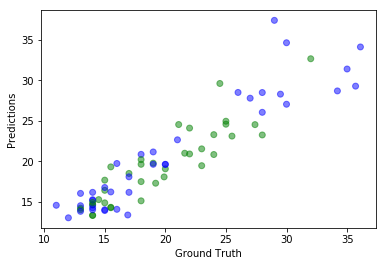

In [25]:
#plt.scatter(features_test, depVar_test,  color='black')
plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();